In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kk=pd.read_csv(' Covid_dataMultipleLinearRegr.csv')

In [3]:
kk

,age,Body Temp,Chronic disease,Blood O2 Level in Percentage,Anti Bodies
0,10,Moderate,0,97,127181
1,80,High,0,92,61004
2,10,Low,0,97,111911
3,81,High,4,75,39010
4,12,Moderate,0,97,110911
...,...,...,...,...,...
65,76,High,4,80,39010
66,35,Moderate,0,92,91141
67,13,Moderate,0,94,112101
68,82,High,3,73,42010


In [4]:
kk.head()

,age,Body Temp,Chronic disease,Blood O2 Level in Percentage,Anti Bodies
0,10,Moderate,0,97,127181
1,80,High,0,92,61004
2,10,Low,0,97,111911
3,81,High,4,75,39010
4,12,Moderate,0,97,110911


In [5]:
kk.tail()

,age,Body Temp,Chronic disease,Blood O2 Level in Percentage,Anti Bodies
65,76,High,4,80,39010
66,35,Moderate,0,92,91141
67,13,Moderate,0,94,112101
68,82,High,3,73,42010
69,84,High,3,75,42099


In [6]:
kk.describe()

,age,Chronic disease,Blood O2 Level in Percentage,Anti Bodies
count,70.000000,70.000000,70.000000,70.000000
mean,44.971429,0.800000,81.942857,78013.557143
std,24.084375,1.136993,11.991405,21919.557919
min,10.000000,0.000000,53.000000,37914.000000
25%,25.000000,0.000000,71.250000,61002.500000
50%,41.000000,0.000000,87.000000,80950.500000
75%,62.000000,1.000000,92.000000,95154.000000
max,94.000000,4.000000,99.000000,127181.000000


In [7]:
kk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   age                           70 non-null     int64 
 1   Body Temp                     70 non-null     object
 2   Chronic disease               70 non-null     int64 
 3   Blood O2 Level in Percentage  70 non-null     int64 
 4   Anti Bodies                   70 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.9+ KB


In [8]:
kk.groupby('Body Temp').size()

Body Temp
High        35
Low          4
Moderate    31
dtype: int64

In [9]:
kk.isnull().sum()

age                             0
Body Temp                       0
Chronic disease                 0
Blood O2 Level in Percentage    0
Anti Bodies                     0
dtype: int64

In [10]:
kk.duplicated().sum()

1

In [11]:
kk.drop_duplicates(inplace=True)

In [12]:
kk.duplicated().sum()

0

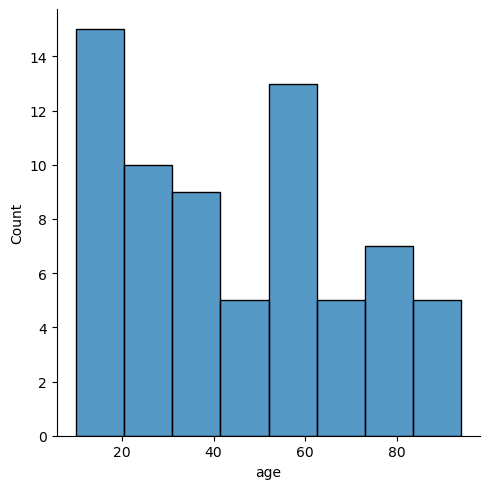

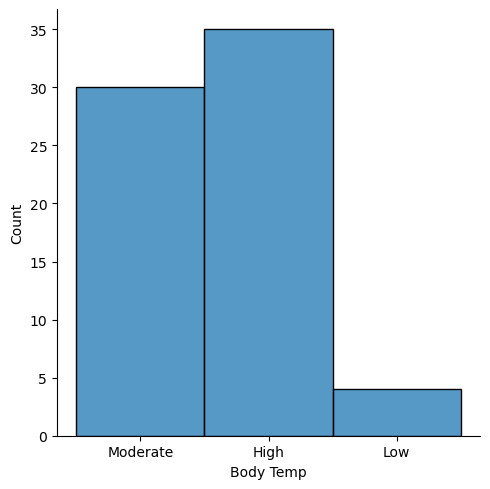

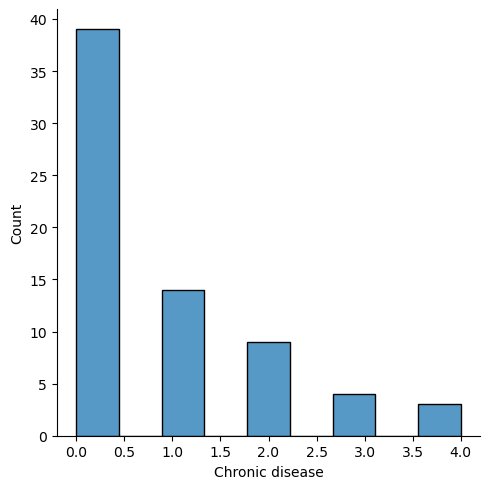

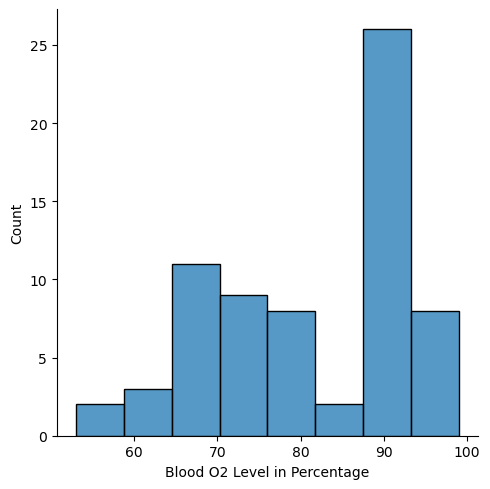

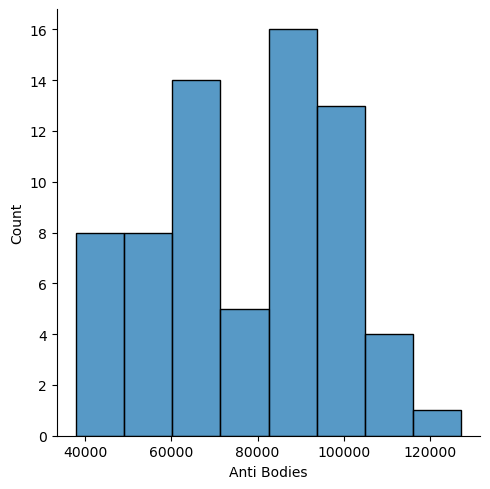

In [13]:
#creating for loop to get the distributon plot for all columns
for columns in kk:
    sns.displot(x=columns,data=kk)

In [14]:
sns.countplot(x='Body Temp',data=kk)

<AxesSubplot:xlabel='Body Temp', ylabel='count'>

In [15]:
sns.pairplot(data=kk)

In [16]:
plt.figure(figsize=(30,30))
sns.heatmap(kk.corr(),cbar=True,square=True,fmt='.1f', annot=True,annot_kws={'size':8},cmap='Reds')

<AxesSubplot:>

In [17]:
#Bivariate analysis
#Barplot
sns.barplot(y='Anti Bodies',x='Blood O2 Level in Percentage',data=kk)

<AxesSubplot:xlabel='Blood O2 Level in Percentage', ylabel='Anti Bodies'>

In [18]:
sns.regplot(y='Anti Bodies',x='Blood O2 Level in Percentage',data=kk)

<AxesSubplot:xlabel='Blood O2 Level in Percentage', ylabel='Anti Bodies'>

In [19]:
sns.barplot(y='Anti Bodies',x='Body Temp',data=kk)

<AxesSubplot:xlabel='Body Temp', ylabel='Anti Bodies'>

In [20]:
sns.barplot(y='Anti Bodies',x='age',data=kk)

<AxesSubplot:xlabel='age', ylabel='Anti Bodies'>

In [21]:
sns.barplot(y='Anti Bodies',x='Chronic disease',data=kk)

<AxesSubplot:xlabel='Chronic disease', ylabel='Anti Bodies'>

In [22]:
#Encoding Categorical 
kk=pd.get_dummies(kk,prefix=['temperature'],columns=['Body Temp'])

In [23]:
kk

,age,Chronic disease,Blood O2 Level in Percentage,Anti Bodies,temperature_High,temperature_Low,temperature_Moderate
0,10,0,97,127181,0,0,1
1,80,0,92,61004,1,0,0
2,10,0,97,111911,0,1,0
3,81,4,75,39010,1,0,0
4,12,0,97,110911,0,0,1
...,...,...,...,...,...,...,...
65,76,4,80,39010,1,0,0
66,35,0,92,91141,0,0,1
67,13,0,94,112101,0,0,1
68,82,3,73,42010,1,0,0


In [24]:
#Divide data in two parts for training and testing the model
X=kk.drop(['Anti Bodies'],axis=1)
Y=kk['Anti Bodies']

In [25]:
X,Y

(    age  Chronic disease  Blood O2 Level in Percentage  temperature_High  \
 0    10                0                            97                 0   
 1    80                0                            92                 1   
 2    10                0                            97                 0   
 3    81                4                            75                 1   
 4    12                0                            97                 0   
 ..  ...              ...                           ...               ...   
 65   76                4                            80                 1   
 66   35                0                            92                 0   
 67   13                0                            94                 0   
 68   82                3                            73                 1   
 69   84                3                            75                 1   
 
     temperature_Low  temperature_Moderate  
 0                 0         

## Normalization of data

In [26]:
#scale the feature from MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
Xs=scaler.fit_transform(X)

In [27]:
Xs

array([[0.        , 0.        , 0.95652174, 0.        , 0.        ,
        1.        ],
       [0.83333333, 0.        , 0.84782609, 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.95652174, 0.        , 1.        ,
        0.        ],
       [0.8452381 , 1.        , 0.47826087, 1.        , 0.        ,
        0.        ],
       [0.02380952, 0.        , 0.95652174, 0.        , 0.        ,
        1.        ],
       [0.0952381 , 0.        , 0.2826087 , 0.        , 1.        ,
        0.        ],
       [0.03571429, 0.        , 0.86956522, 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 0.23913043, 1.        , 0.        ,
        0.        ],
       [0.9047619 , 0.5       , 0.5       , 1.        , 0.        ,
        0.        ],
       [0.11904762, 0.        , 0.84782609, 0.        , 0.        ,
        1.        ],
       [0.05952381, 0.        , 0.89130435, 0.        , 0.        ,
        1.        ],
       [0.05952381, 0

In [28]:
from sklearn.preprocessing import StandardScaler
scalers=StandardScaler()


In [29]:
Xs=scalers.fit_transform(Xs)

In [30]:
Xs

array([[-1.4925865 , -0.71641954,  1.28888615, -1.01459931, -0.24806947,
         1.14017543],
       [ 1.45475315, -0.71641954,  0.86700217,  0.98561076, -0.24806947,
        -0.87705802],
       [-1.4925865 , -0.71641954,  1.28888615, -1.01459931,  4.03112887,
        -0.87705802],
       [ 1.496858  ,  2.81450533, -0.56740339,  0.98561076, -0.24806947,
        -0.87705802],
       [-1.40837679, -0.71641954,  1.28888615, -1.01459931, -0.24806947,
         1.14017543],
       [-1.15574768, -0.71641954, -1.32679457, -1.01459931,  4.03112887,
        -0.87705802],
       [-1.36627194, -0.71641954,  0.95137896, -1.01459931, -0.24806947,
         1.14017543],
       [ 2.04422108,  2.81450533, -1.49554817,  0.98561076, -0.24806947,
        -0.87705802],
       [ 1.70738226,  1.0490429 , -0.48302659,  0.98561076, -0.24806947,
        -0.87705802],
       [-1.07153797, -0.71641954,  0.86700217, -1.01459931, -0.24806947,
         1.14017543],
       [-1.28206224, -0.71641954,  1.03575576, -1.

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.21,random_state=132)

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import LinearRegression
# create instances of all models
models = {
    #'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Linear Regression': LinearRegression(),
    #'Naive Bayes': GaussianNB(),
    #'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=11),
    'Bagging': BaggingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Extra Trees': ExtraTreeRegressor(),
    
}

from sklearn.metrics import r2_score
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = r2_score( Y_train,X_train_prediction)
    print(f'{name}:\ntrainr2_sore: {trainacc:.4f}')
#for training data  
print("TESTING r2_score:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = r2_score( Y_test,y_pred)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}') 

    

Linear Regression:
trainr2_sore: 0.9582
K-Nearest Neighbors:
trainr2_sore: 0.9449
Decision Tree:
trainr2_sore: 1.0000
Random Forest:
trainr2_sore: 0.9765
Bagging:
trainr2_sore: 0.9917
AdaBoost:
trainr2_sore: 0.9869
Gradient Boosting:
trainr2_sore: 0.9998
Extra Trees:
trainr2_sore: 1.0000
TESTING r2_score:
Linear Regression:
testingAccuracy: 0.9344
K-Nearest Neighbors:
testingAccuracy: 0.8386
Decision Tree:
testingAccuracy: 0.8114
Random Forest:
testingAccuracy: 0.8094
Bagging:
testingAccuracy: 0.8674
AdaBoost:
testingAccuracy: 0.8421
Gradient Boosting:
testingAccuracy: 0.8574
Extra Trees:
testingAccuracy: 0.6474


In [129]:
model=LinearRegression()

In [130]:
model.fit(X_train, Y_train)

LinearRegression()

In [131]:
y_pred = model.predict(X_test)
testacc = r2_score( Y_test,y_pred)

In [132]:
testacc

0.9344327769064233

In [133]:
#now i want to compare with the data with the actual value and predicted value
#np.set_printoptions(precision=8)
#print(np.concatenate((y_pred.reshape(len(y_pred), 1),Y_test.reshape(len(Y_test),1)), 1))

In [134]:
#visualizing the data
#plt.plot(y_pred)
#plt.plot(Y_test)
#plt.show()

In [135]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(y_pred,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Linear Regression ')


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Linear Regression ')

In [136]:
# making a predictive System for testing the data 
# making a predictive System
input_data=X.loc[4]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
sc=scaler.transform(input_data_reshaped)
print(sc)
std_data=scalers.transform(sc)
print(std_data)
prediction=model.predict(std_data)#model=Decision Tree
print("target:",prediction)
#if(prediction==1):
#    print("The Person is suffering from the depression type : bipolar II")
#elif(prediction==2):
 #   print("The Person is suffering from the depression type :unipolar depressive")
#elif(prediction==3):
 #   print("The Person is suffering from the depression type :bipolar I")    

[[0.02380952 0.         0.95652174 0.         0.         1.        ]]
[[-1.40837679 -0.71641954  1.28888615 -1.01459931 -0.24806947  1.14017543]]
target: [107503.39713646]


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [126]:
kk

,age,Chronic disease,Blood O2 Level in Percentage,Anti Bodies,temperature_High,temperature_Low,temperature_Moderate
0,10,0,97,127181,0,0,1
1,80,0,92,61004,1,0,0
2,10,0,97,111911,0,1,0
3,81,4,75,39010,1,0,0
4,12,0,97,110911,0,0,1
...,...,...,...,...,...,...,...
65,76,4,80,39010,1,0,0
66,35,0,92,91141,0,0,1
67,13,0,94,112101,0,0,1
68,82,3,73,42010,1,0,0
